#**Medical insurance prediction - Regression**

## **UNDERSTAND THE PROBLEM STATEMENT**

Aim of the problem is to find the health insurance cost incured by Individuals based on thier age, gender, BMI, number of children, smoking habit and geo-location.

Features available are:

sex: insurance contractor gender, female, male

bmi: Body mass index (ideally 18.5 to 24.9)

children: Number of children covered by health insurance / Number of dependents

smoker: smoking habits

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

Data Source:https://www.kaggle.com/mirichoi0218/insurance

##**IMPORT LIBRARIES AND DATASETS**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Read the CSV file "insurance.csv" using pandas.

Visualize the first and last 5 rows

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# read the csv file 
insurance_df = pd.read_csv('/content/drive/MyDrive/AWS Sagemaker/2. Medical Insurance Premium Prediction/insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


##**PERFORM EXPLORATORY DATA ANALYSIS**

In [5]:
# Check the dataframe info
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Calculate the mean and standard deviation of the age, charges and bmi

In [6]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# Check unique values in the 'region' column
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [8]:
# Check unique values in the 'smoker' column
insurance_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [9]:
# Check unique values in the 'sex' column
insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [10]:
# Check unique values in the 'children' column
insurance_df['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [11]:
len(insurance_df['children'].unique())

6

In [12]:
insurance_df['children'].nunique()

6

In [13]:
insurance_df.duplicated().sum()

1

In [14]:
insurance_df[insurance_df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [15]:
# check if there are any Null values
insurance_df.isnull().values.any()

False

In [16]:
# check if there are any Null values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

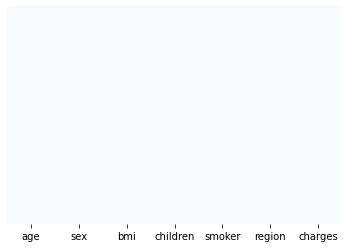

In [17]:
# check if there are any Null values
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [18]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index
df_region = insurance_df.groupby(by='region').mean()
df_region

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [19]:
df_region[df_region['charges'] == df_region['charges'].max()]

,age,bmi,children,charges
region,,,,
southeast,38.93956,33.355989,1.049451,14735.411438


In [20]:
df_region[df_region['charges'] == df_region['charges'].min()]

,age,bmi,children,charges
region,,,,
southwest,39.455385,30.596615,1.141538,12346.937377


In [21]:
df_region.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4.0,39.215097,0.213575,38.939560,39.132582,39.232721,39.315235,39.455385
bmi,4.0,30.581473,1.965503,29.173503,29.193214,29.898200,31.286459,33.355989
children,4.0,1.096244,0.055925,1.046296,1.048662,1.095495,1.143077,1.147692
charges,4.0,13226.577176,1116.118512,12346.937377,12399.915875,12911.979945,13738.641247,14735.411438


Group data by 'age' and examine the relationship between 'age' and 'charge

In [22]:
# Grouping by age to see any relationship between age and charges
# Seems like age 64 has the highest charges and 21 the lowest
df_age = insurance_df.groupby(by='age').mean()
df_age

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


In [23]:
df_age[df_age['charges'] == df_age['charges'].min()]

,bmi,children,charges
age,,,
21,28.185714,0.785714,4730.46433


In [24]:
df_age[df_age['charges'] == df_age['charges'].max()]

,bmi,children,charges
age,,,
64,32.976136,0.772727,23275.530837


In [25]:
# Grouping by bmi to see any relationship between bmi and charges
df_bmi = insurance_df.groupby(by='bmi').mean()
df_bmi

,age,children,charges
bmi,,,
15.960,18.000000,0.000000,1694.796400
16.815,29.500000,1.500000,4904.000350
17.195,26.000000,2.000000,14455.644050
17.290,27.666667,1.333333,7813.353433
17.385,23.000000,1.000000,2775.192150
...,...,...,...
48.070,46.000000,2.000000,9432.925300
49.060,58.000000,0.000000,11381.325400
50.380,23.000000,1.000000,2438.055200


In [26]:
df_bmi[df_bmi['charges'] == df_bmi['charges'].min()]

,age,children,charges
bmi,,,
43.01,18.0,0.0,1149.3959


In [27]:
df_bmi[df_bmi['charges'] == df_bmi['charges'].max()]

,age,children,charges
bmi,,,
47.41,54.0,0.0,63770.42801


In [28]:
# Grouping by children to see any relationship between children and charges
df_children = insurance_df.groupby(by='children').mean()
df_children

,age,bmi,charges
children,,,
0,38.444251,30.550296,12365.975602
1,39.453704,30.623148,12731.171832
2,39.445833,30.978104,15073.563734
3,41.566879,30.684331,15355.318367
4,39.000000,31.391200,13850.656311
5,35.611111,29.605000,8786.035247


In [29]:
df_children[df_children['charges'] == df_children['charges'].max()]

,age,bmi,charges
children,,,
3,41.566879,30.684331,15355.318367


In [30]:
df_children[df_children['charges'] == df_children['charges'].min()]

,age,bmi,charges
children,,,
5,35.611111,29.605,8786.035247


In [31]:
# convert categorical variable to numerical

insurance_df['sex'] = insurance_df['sex'].apply(lambda x: 0 if x == 'female' else 1)
insurance_df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,yes,southwest,16884.9240
1,18,1,33.77,1,no,southeast,1725.5523


In [32]:
insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)
insurance_df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,southwest,16884.9240
1,18,1,33.77,1,0,southeast,1725.5523


In [33]:
region_dummies = pd.get_dummies(insurance_df['region'], drop_first = True)
insurance_df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,southwest,16884.9240
1,18,1,33.77,1,0,southeast,1725.5523


In [34]:
region_dummies

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [35]:
insurance_df = pd.concat([insurance_df, region_dummies], axis = 1)
insurance_df.head(2)

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.90,0,1,southwest,16884.9240,0,0,1
1,18,1,33.77,1,0,southeast,1725.5523,0,1,0


In [36]:
# Let's drop the original 'region' column 
insurance_df.drop(['region'], axis = 1, inplace = True)
insurance_df.head(2)

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.90,0,1,16884.9240,0,0,1
1,18,1,33.77,1,0,1725.5523,0,1,0


##**VISUALIZE DATASET**

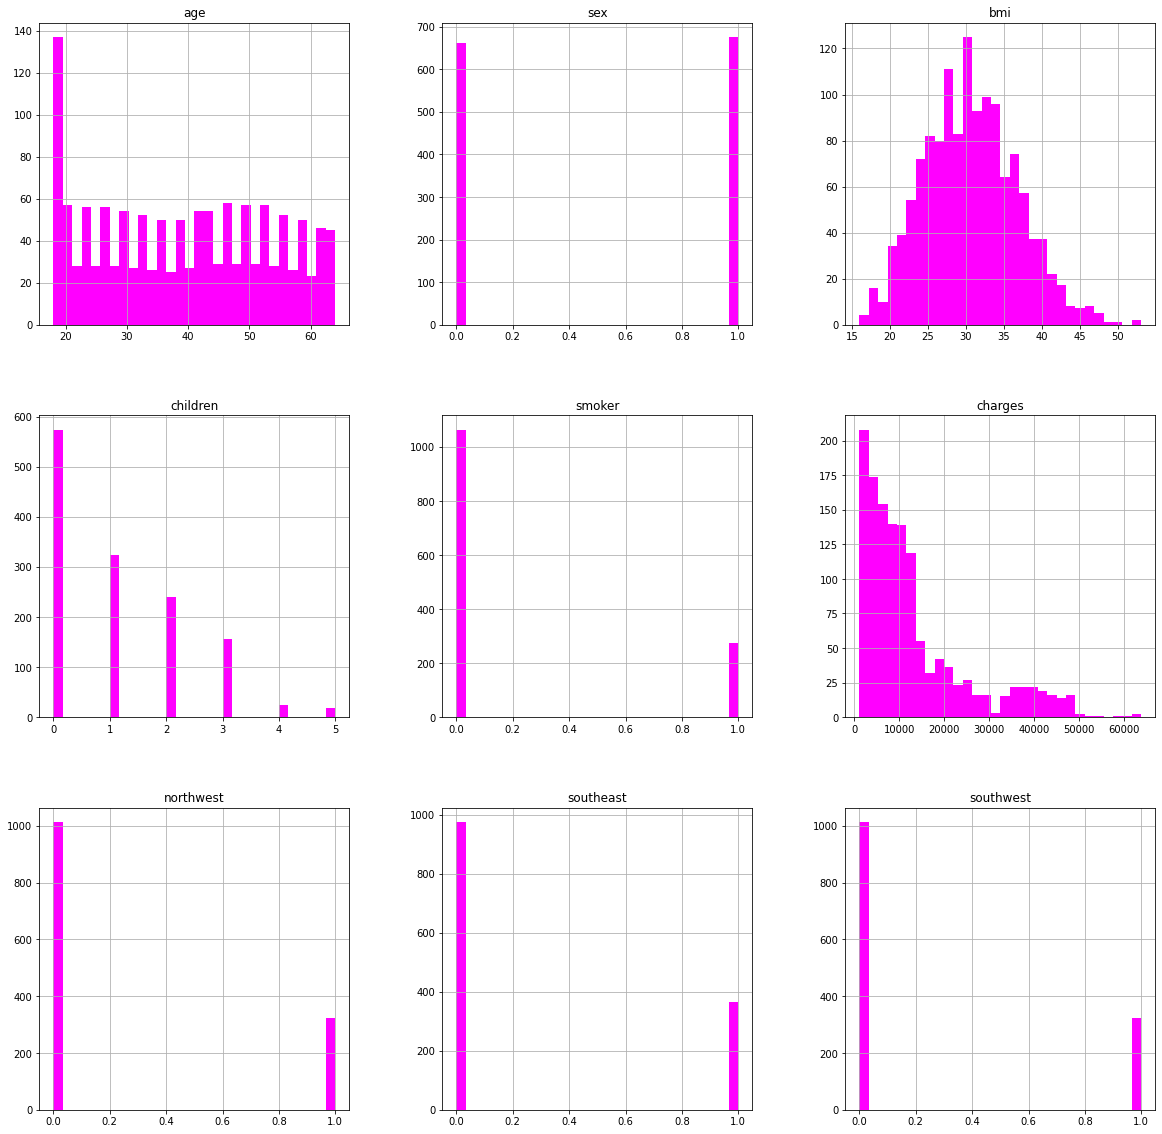

In [37]:
insurance_df.hist(bins = 30, figsize = (20,20), color = 'magenta');

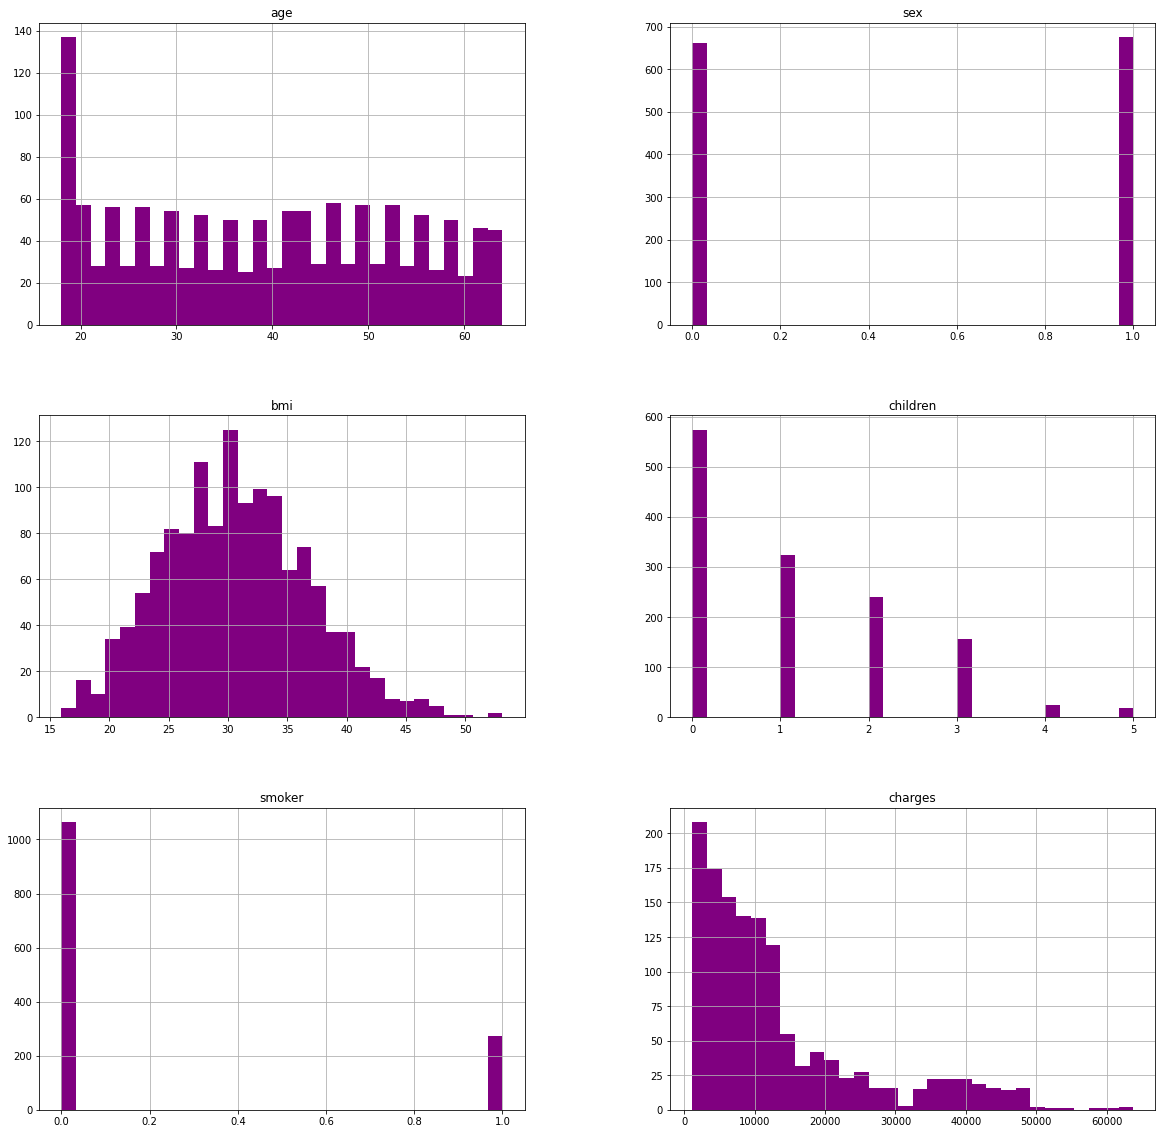

In [38]:
insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins = 30, figsize = (20,20), color = 'purple');

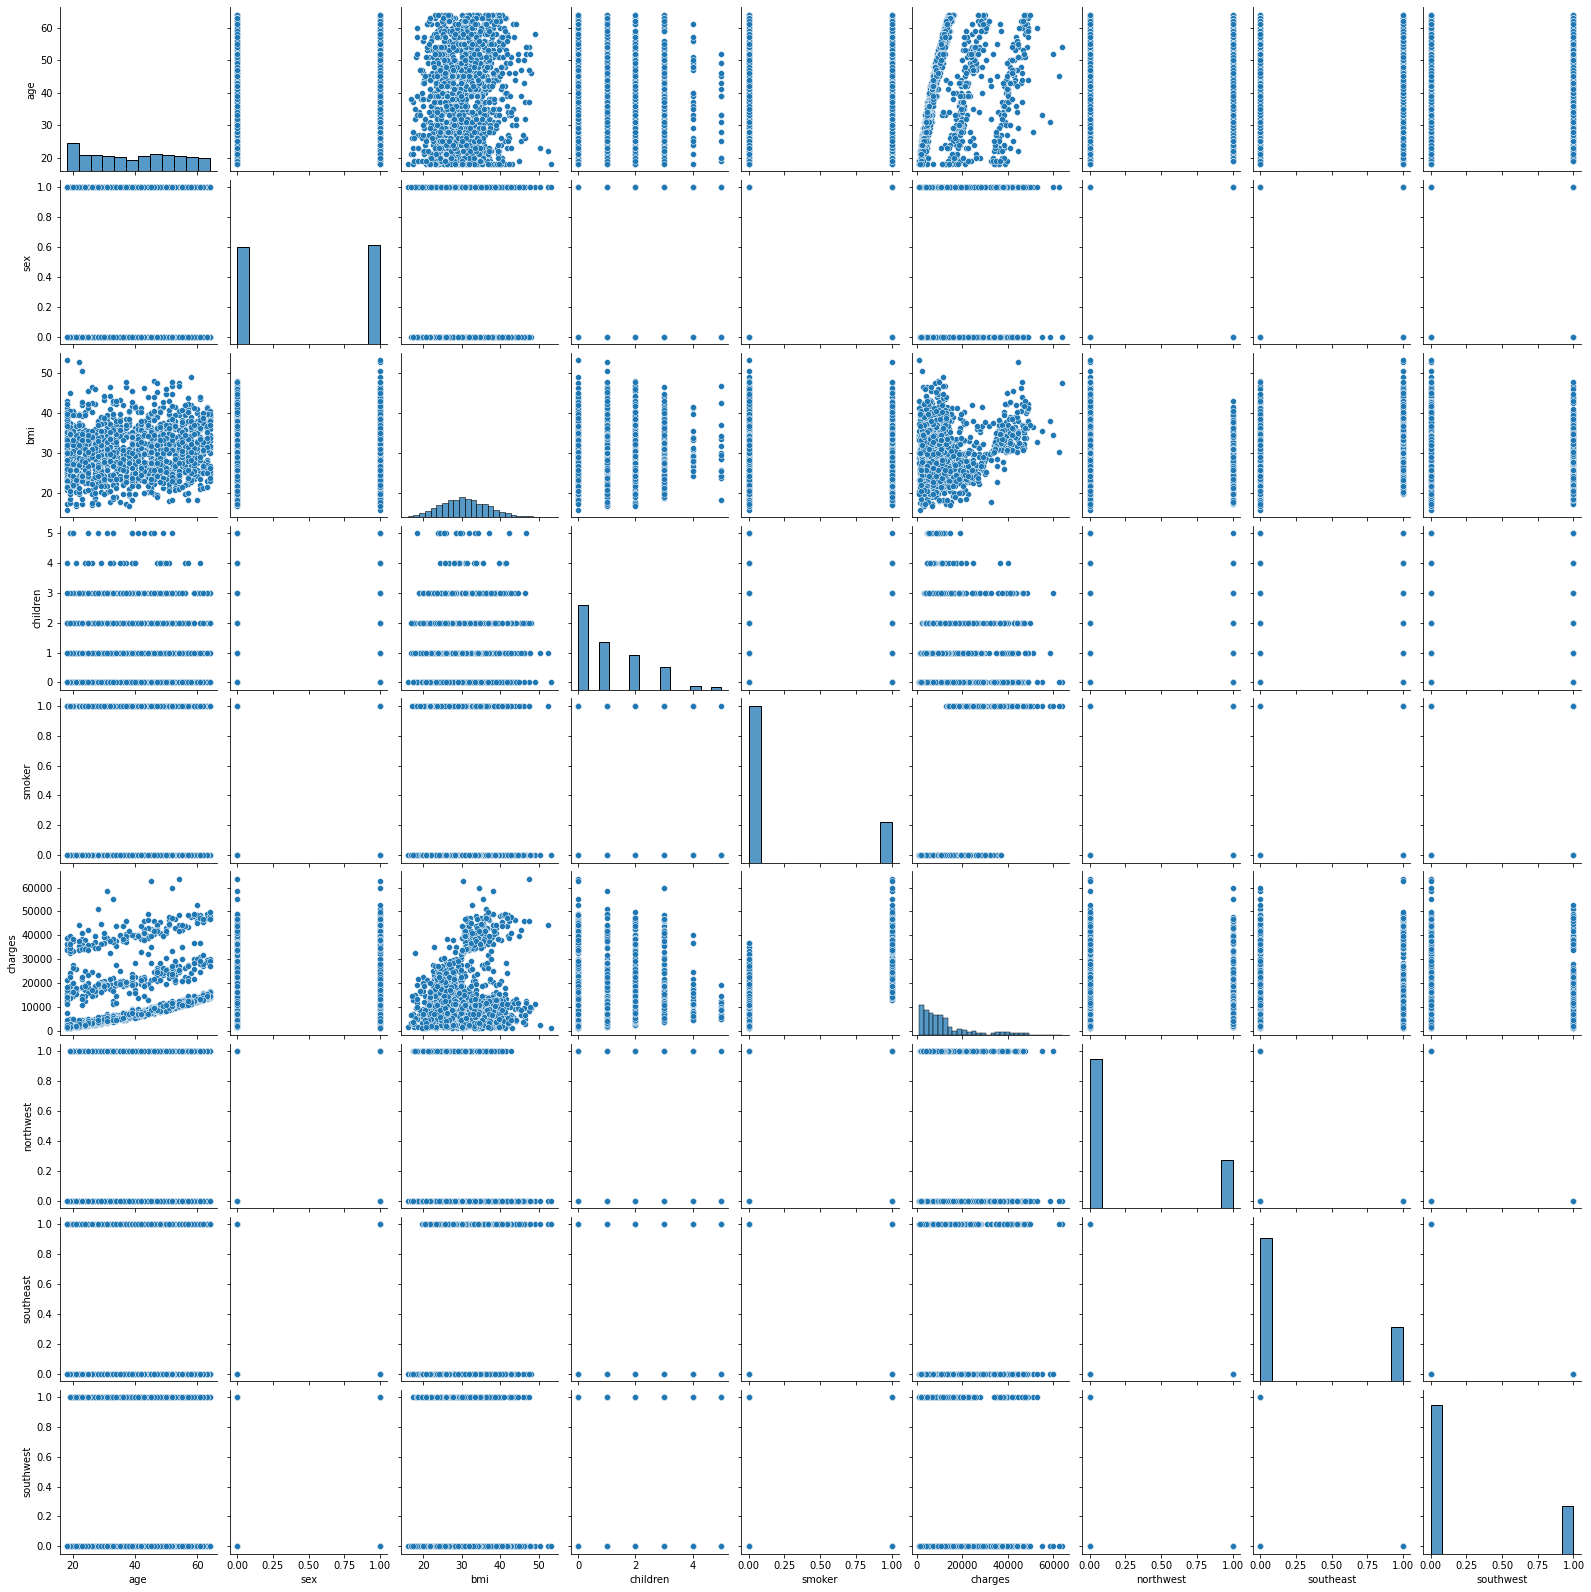

In [39]:
# plot pairplot
sns.pairplot(insurance_df);

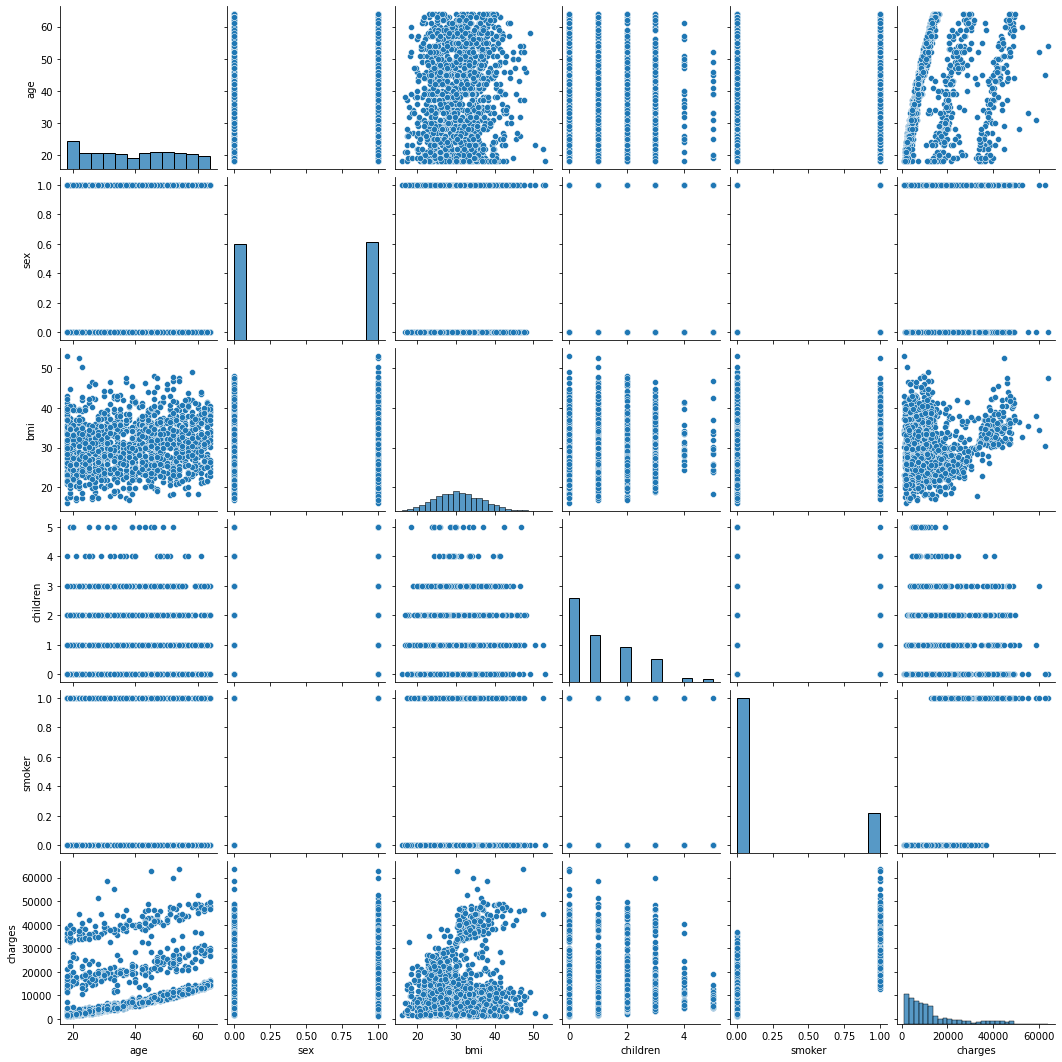

In [40]:
# plot pairplot
sns.pairplot(insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']]);

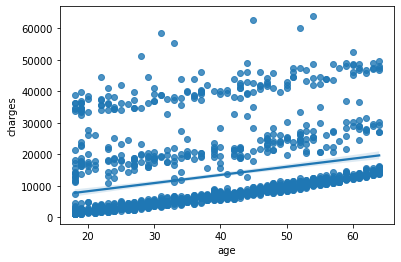

In [41]:
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show();

[ 257.72261867 3165.88500606]


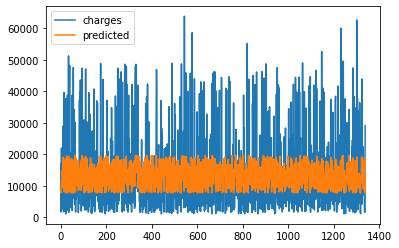

In [42]:
# Fit coefficents.
coef = np.polyfit(insurance_df['age'], insurance_df['charges'], 1)
print(coef)

# Generate predictions for entire series.
insurance_df['predicted'] = pd.Series(np.polyval(coef, insurance_df['age']))
insurance_df[['charges', 'predicted']].plot();

In [43]:
# Passing in a single year.
x = 25
print('Predicted charges for age {}: {:.2f} dollars'.format(x, np.polyval(coef, x)))

Predicted charges for age 25: 9608.95 dollars


Obtain the regplot between bmi and charges

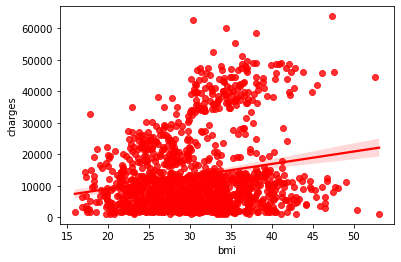

In [44]:
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df, color = 'r')
plt.show();

[ 393.8730308  1192.93720896]


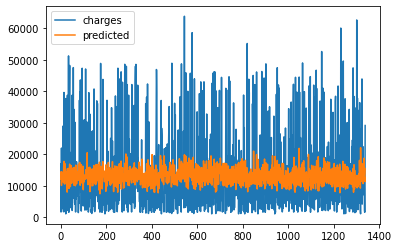

In [45]:
# Fit coefficents.
coef = np.polyfit(insurance_df['bmi'], insurance_df['charges'], 1)
print(coef)

# Generate predictions for entire series.
insurance_df['predicted'] = pd.Series(np.polyval(coef, insurance_df['bmi']))
insurance_df[['charges', 'predicted']].plot();

In [46]:
# Passing in a single year.
x = 25
print('Predicted charges for BMI {}: {:.2f} dollars'.format(x, np.polyval(coef, x)))

Predicted charges for BMI 25: 11039.76 dollars


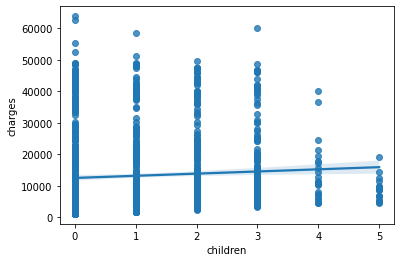

In [47]:
sns.regplot(x = 'children', y = 'charges', data = insurance_df)
plt.show();

[  683.08938248 12522.49554964]


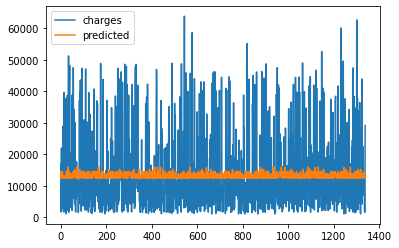

In [48]:
# Fit coefficents.
coef = np.polyfit(insurance_df['children'], insurance_df['charges'], 1)
print(coef)

# Generate predictions for entire series.
insurance_df['predicted'] = pd.Series(np.polyval(coef, insurance_df['children']))
insurance_df[['charges', 'predicted']].plot();

In [49]:
# Passing in a single year.
x = 3
print('Predicted charges for {} children: {:.2f} dollars'.format(x, np.polyval(coef, x)))

Predicted charges for 3 children: 14571.76 dollars


Calculate and plot the correlation matrix

Which feature has the most positive correlation with charges?

In [50]:
insurance_df.drop(['predicted'], axis = 1, inplace = True)

In [51]:
insurance_df.corr()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


In [52]:
insurance_df.corr().round(2)

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
age,1.00,-0.02,0.11,0.04,-0.03,0.30,-0.00,-0.01,0.01
sex,-0.02,1.00,0.05,0.02,0.08,0.06,-0.01,0.02,-0.00
bmi,0.11,0.05,1.00,0.01,0.00,0.20,-0.14,0.27,-0.01
children,0.04,0.02,0.01,1.00,0.01,0.07,0.02,-0.02,0.02
smoker,-0.03,0.08,0.00,0.01,1.00,0.79,-0.04,0.07,-0.04
charges,0.30,0.06,0.20,0.07,0.79,1.00,-0.04,0.07,-0.04
northwest,-0.00,-0.01,-0.14,0.02,-0.04,-0.04,1.00,-0.35,-0.32
southeast,-0.01,0.02,0.27,-0.02,0.07,0.07,-0.35,1.00,-0.35
southwest,0.01,-0.00,-0.01,0.02,-0.04,-0.04,-0.32,-0.35,1.00


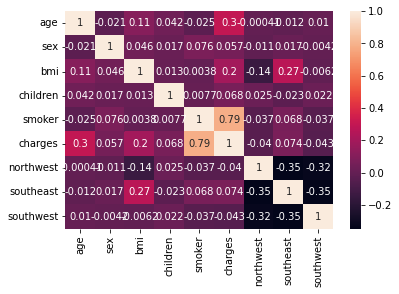

In [53]:
sns.heatmap(insurance_df.corr(), annot = True);

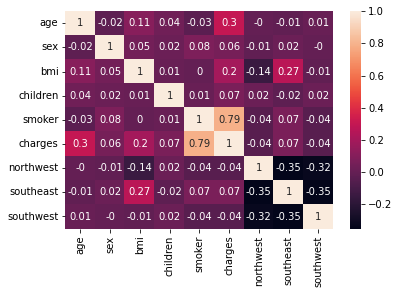

In [54]:
sns.heatmap(insurance_df.corr().round(2), annot = True);

Smoker and age have positive correlations with charges

## **CREATE TRAINING AND TESTING DATASET**

In [55]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [56]:
X = insurance_df.drop(columns =['charges'])
y = insurance_df['charges']

In [57]:
X

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [58]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [59]:
X.shape

(1338, 8)

In [60]:
y.shape

(1338,)

In [61]:
X.dtypes

age            int64
sex            int64
bmi          float64
children       int64
smoker         int64
northwest      uint8
southeast      uint8
southwest      uint8
dtype: object

In [62]:
y.dtype

dtype('float64')

We can see that it is using 64-bit integer numbers by default. In some situations, it can be more memory efficient to use shorter integer numbers when handling a large dataset. To do that, you can simply call astype('int8') , astype('int16') or astype('int32').

Similarly, if we want to convert the data type to float, we can call astype('float'). By default, it is using 64-bit floating-point numbers. We can use 'float128' for more precision or 'float16' for better memory efficiency.

If we want to convert a float column to integers, we can try using the astype() we used above.Beware, If we use this method, all will be rounded down. For example, a value 4.7,  instead of rounding up to 5, it gets rounded down to 4. It might be okay, but in most cases, that is not. If we want to convert to integers and round the way that we would expect we can do round() first.
 
df['float_col'] = df['float_col'].round(0).astype('int')

In [63]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [64]:
y.shape

(1338,)

In [65]:
y = y.reshape(-1,1)

In [66]:
y.shape

(1338, 1)

In [67]:
# Only take the numerical variables and scale them
X 

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [68]:
y

array([[16884.924 ],
       [ 1725.5522],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.36  ]], dtype=float32)

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [70]:
#scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

## **TRAIN AND TEST A LINEAR REGRESSION MODEL IN SK-LEARN**

In [71]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [72]:
regressor_accuracy = regressor.score(X_test, y_test)
regressor_accuracy

0.7835929767702696

In [73]:
y_predict = regressor.predict(X_test)

In [74]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model

n: The number of observations

k: The number of predictor variables

In [75]:
k = X_test.shape[1]
k

8

In [76]:
n = len(X_test)
n

268

In [77]:
X_test.shape

(268, 8)

In [78]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.1f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
r2_rounded = r2_score(y_test_orig, y_predict_orig).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nR2 rounded =' ,r2_rounded, '\nAdjusted R2 =' ,adjusted_r2)

RMSE = 5796.3 
MSE = 33596910.0 
MAE = 4181.195 
R2 = 0.7835929892113018 
R2 rounded = 0.78 
Adjusted R2 = 0.777


In [79]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test_orig, y_predict_orig))
print('MSE:', metrics.mean_squared_error(y_test_orig, y_predict_orig))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_orig, y_predict_orig)))
print('R2:',metrics.r2_score(y_test_orig, y_predict_orig))
print('R2 rounded:',(metrics.r2_score(y_test_orig, y_predict_orig)).round(2))
print('Adjusted_r2: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))

MAE: 4181.195
MSE: 33596910.0
RMSE: 5796.284
R2: 0.7835929892113018
R2 rounded: 0.78
Adjusted_r2:  0.777


In [80]:
pred_value = pd.DataFrame(y_predict_orig, columns = ['pred_value'])
pred_value.head()

,pred_value
0,8969.547852
1,7068.748535
2,36858.410156
3,9454.681641
4,26973.177734


In [81]:
original_value = pd.DataFrame(y_test_orig, columns = ['original_value'])
original_value

,original_value
0,9095.068359
1,5272.176270
2,29330.982422
3,9301.893555
4,33750.292969
...,...
263,47055.531250
264,12222.898438
265,6067.126953
266,63770.433594


In [82]:
ytestpred = original_value.join (pred_value)
ytestpred

,original_value,pred_value
0,9095.068359,8969.547852
1,5272.176270,7068.748535
2,29330.982422,36858.410156
3,9301.893555,9454.681641
4,33750.292969,26973.177734
...,...,...
263,47055.531250,39061.496094
264,12222.898438,11761.497070
265,6067.126953,7687.561523
266,63770.433594,40920.296875
